Ques.1(a) No. Training Samples - 8143
    No. Test Samples - 9752

b) 

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
testdata = pd.read_csv('testData.txt', sep=',')
traindata = pd.read_csv('trainData.txt', sep=',')

testdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9752 entries, 1 to 9752
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           9752 non-null   object 
 1   Temperature    9752 non-null   float64
 2   Humidity       9752 non-null   float64
 3   Light          9752 non-null   float64
 4   CO2            9752 non-null   float64
 5   HumidityRatio  9752 non-null   float64
 6   Occupancy      9752 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 609.5+ KB


In [4]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8143 non-null   object 
 1   Temperature    8143 non-null   float64
 2   Humidity       8143 non-null   float64
 3   Light          8143 non-null   float64
 4   CO2            8143 non-null   float64
 5   HumidityRatio  8143 non-null   float64
 6   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 508.9+ KB


In [6]:
X = traindata.iloc[:5000, 1:6]
Y = testdata.iloc[:5000, -1:]

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=0)

In [7]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(4000, 5) (4000, 1) (1000, 5) (1000, 1)


In [8]:
model = tf.keras.Sequential()
model.add(Dense(16, activation='relu',input_shape=(5, ))) 
model.add(Dense(32, activation='softplus')) 
model.add(Dense(1, activation='sigmoid')) 

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                96        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 673
Trainable params: 673
Non-trainable params: 0
_________________________________________________________________


In [9]:
lossfunction = tf.keras.losses.BinaryCrossentropy()
model.compile(optimizer= 'adam', loss= lossfunction, metrics=['accuracy'])

In [10]:
fitmodel = model.fit(train_x, train_y, epochs=5, validation_split=0.3)

Epoch 1/5
88/88 [==============================] - 1s 5ms/step - loss: 5.4146 - accuracy: 0.6954 - val_loss: 0.8642 - val_accuracy: 0.5842
Epoch 2/5
88/88 [==============================] - 0s 3ms/step - loss: 0.6233 - accuracy: 0.7882 - val_loss: 0.5252 - val_accuracy: 0.8083
Epoch 3/5
88/88 [==============================] - 0s 3ms/step - loss: 0.5184 - accuracy: 0.8011 - val_loss: 0.6358 - val_accuracy: 0.8000
Epoch 4/5
88/88 [==============================] - 0s 3ms/step - loss: 0.5907 - accuracy: 0.7825 - val_loss: 0.8820 - val_accuracy: 0.7175
Epoch 5/5
88/88 [==============================] - 0s 3ms/step - loss: 0.5504 - accuracy: 0.8061 - val_loss: 0.4825 - val_accuracy: 0.7883


In [11]:
training_loss, training_acc = model.evaluate(train_x, train_y)
testing_loss, testing_acc = model.evaluate(test_x, test_y)

32/32 [==============================] - 0s 1ms/step - loss: 0.4995 - accuracy: 0.7740


In [12]:
pred = model.predict(test_x)
test_pred = np.argmax(pred, axis = 1)
confusion_matrix = tf.math.confusion_matrix(labels= test_y, predictions=test_pred)
print(confusion_matrix)

32/32 [==============================] - 0s 1ms/step
tf.Tensor(
[[804   0]
 [196   0]], shape=(2, 2), dtype=int32)


Epoch 1/5
88/88 [==============================] - 0s 3ms/step - loss: 0.4561 - accuracy: 0.8132 - val_loss: 0.7336 - val_accuracy: 0.8017
Epoch 2/5
88/88 [==============================] - 0s 3ms/step - loss: 0.4851 - accuracy: 0.8021 - val_loss: 0.4663 - val_accuracy: 0.7817
Epoch 3/5
88/88 [==============================] - 0s 3ms/step - loss: 0.5255 - accuracy: 0.8039 - val_loss: 0.9859 - val_accuracy: 0.7775
Epoch 4/5
88/88 [==============================] - 0s 3ms/step - loss: 0.5094 - accuracy: 0.8043 - val_loss: 0.5615 - val_accuracy: 0.8058
Epoch 5/5
88/88 [==============================] - 0s 3ms/step - loss: 0.6531 - accuracy: 0.7864 - val_loss: 0.3906 - val_accuracy: 0.8317


Text(0, 0.5, 'Accuracy')

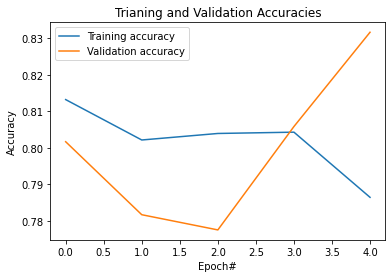

In [13]:
fitModel = model.fit(train_x, train_y, epochs = 5, validation_split = 0.3)


plt.plot(fitModel.history['accuracy'])
plt.plot(fitModel.history['val_accuracy'])
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.title('Trianing and Validation Accuracies')
plt.xlabel('Epoch#')
plt.ylabel('Accuracy')




Text(0, 0.5, 'Loss')

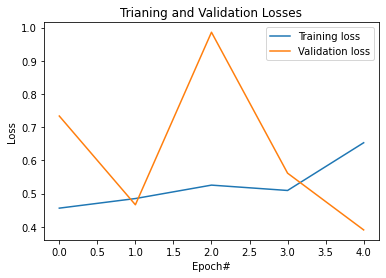

In [14]:
plt.plot(fitModel.history['loss'])
plt.plot(fitModel.history['val_loss'])
plt.legend(['Training loss', 'Validation loss'])
plt.title('Trianing and Validation Losses')
plt.xlabel('Epoch#')
plt.ylabel('Loss')

c) It is a three layer model with accuracy 79%

In [15]:
test_predict = model.predict(test_x)
test_predict_labels = np.argmax(test_predict, axis = 1)
confusion_matrix = tf.math.confusion_matrix(labels = test_y, predictions = test_predict_labels)
print('confusion Matrix\n', confusion_matrix)


32/32 [==============================] - 0s 1ms/step
confusion Matrix
 tf.Tensor(
[[804   0]
 [196   0]], shape=(2, 2), dtype=int32)


d) Adding one more hidden layer - 5 Input, Hidden Layer1, Hidden Layer2 and one output

In [16]:
model2 = tf.keras.Sequential()
model2.add(Dense(16, activation='relu',input_shape=(5, ))) 
model2.add(Dense(32, activation='softplus'))
model2.add(Dense(32, activation='softplus')) 
model2.add(Dense(1, activation='sigmoid')) 

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                96        
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,729
Trainable params: 1,729
Non-trainable params: 0
_________________________________________________________________


In [17]:
lossfunction = tf.keras.losses.BinaryCrossentropy()
model2.compile(optimizer= 'adam', loss= lossfunction, metrics=['accuracy'])

In [18]:
fitmodel = model2.fit(train_x, train_y, epochs=5, validation_split=0.3)

Epoch 1/5
88/88 [==============================] - 1s 5ms/step - loss: 3.6014 - accuracy: 0.7300 - val_loss: 0.5672 - val_accuracy: 0.7258
Epoch 2/5
88/88 [==============================] - 0s 3ms/step - loss: 0.4874 - accuracy: 0.8075 - val_loss: 0.4974 - val_accuracy: 0.8108
Epoch 3/5
88/88 [==============================] - 0s 3ms/step - loss: 0.4753 - accuracy: 0.8004 - val_loss: 0.5550 - val_accuracy: 0.8050
Epoch 4/5
88/88 [==============================] - 0s 3ms/step - loss: 0.4665 - accuracy: 0.8121 - val_loss: 0.5328 - val_accuracy: 0.7733
Epoch 5/5
88/88 [==============================] - 0s 3ms/step - loss: 0.4416 - accuracy: 0.8143 - val_loss: 0.5422 - val_accuracy: 0.8058


In [19]:
training_loss, training_acc = model2.evaluate(train_x, train_y)
testing_loss, testing_acc = model2.evaluate(test_x, test_y)

32/32 [==============================] - 0s 2ms/step - loss: 0.5295 - accuracy: 0.8070


In [20]:
pred = model2.predict(test_x)
test_pred = np.argmax(pred, axis = 1)
confusion_matrix = tf.math.confusion_matrix(labels= test_y, predictions=test_pred)
print(confusion_matrix)

32/32 [==============================] - 0s 1ms/step
tf.Tensor(
[[804   0]
 [196   0]], shape=(2, 2), dtype=int32)


Epoch 1/5
88/88 [==============================] - 0s 3ms/step - loss: 0.4705 - accuracy: 0.8093 - val_loss: 0.5119 - val_accuracy: 0.7958
Epoch 2/5
88/88 [==============================] - 0s 3ms/step - loss: 0.4312 - accuracy: 0.8232 - val_loss: 0.4589 - val_accuracy: 0.7992
Epoch 3/5
88/88 [==============================] - 0s 3ms/step - loss: 0.4109 - accuracy: 0.8221 - val_loss: 0.4608 - val_accuracy: 0.8042
Epoch 4/5
88/88 [==============================] - 0s 3ms/step - loss: 0.4252 - accuracy: 0.8157 - val_loss: 0.5419 - val_accuracy: 0.8083
Epoch 5/5
88/88 [==============================] - 0s 3ms/step - loss: 0.4000 - accuracy: 0.8293 - val_loss: 0.4146 - val_accuracy: 0.8150


Text(0, 0.5, 'Accuracy')

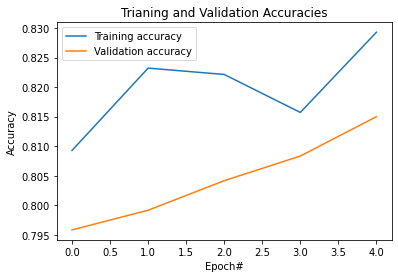

In [21]:
fitModel = model2.fit(train_x, train_y, epochs = 5, validation_split = 0.3)


plt.plot(fitModel.history['accuracy'])
plt.plot(fitModel.history['val_accuracy'])
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.title('Trianing and Validation Accuracies')
plt.xlabel('Epoch#')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

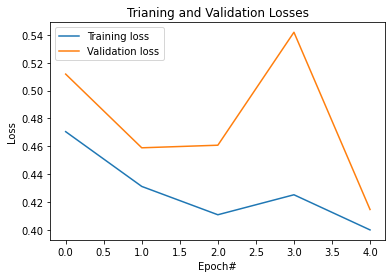

In [22]:
plt.plot(fitModel.history['loss'])
plt.plot(fitModel.history['val_loss'])
plt.legend(['Training loss', 'Validation loss'])
plt.title('Trianing and Validation Losses')
plt.xlabel('Epoch#')
plt.ylabel('Loss')